In [154]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import manifold
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

tf.keras.backend.set_floatx('float64')

In [179]:
class RecurrentAutoencoder(Model):
    def __init__(self, layer1_dim, latent_dim):
        super(RecurrentAutoencoder, self).__init__()
        self.layer1dim = layer1_dim
        
        self.encoder = tf.keras.Sequential([
            layers.LSTM(layer1_dim, activation='relu', return_sequences=False),
            layers.Dropout(0.25),
            layers.Dense(latent_dim, activation = 'linear')
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Reshape((1, latent_dim)),
            layers.Dropout(0.25),
            layers.LSTM(layer1_dim, activation='relu', return_sequences=False),
            layers.Dense(100),
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [180]:
RAE1 = RecurrentAutoencoder(layer1_dim=10, latent_dim=10)
RAE1.compile(optimizer=Adam(learning_rate=0.01), loss=losses.MeanSquaredError())

In [111]:
X_raw = np.load('../data/lightCurves/lc_g_n100.npy');
X = X_raw.copy();
#mins = np.atleast_2d(np.amin(X[:,:,0], axis=1)).T;
#X[:,:,0] -= mins;
X_scaled = StandardScaler().fit(X[:,:,1].T).transform(X[:,:,1].T).T
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=0);
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]));
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]));

In [200]:
from tensorflow.keras import backend as K
K.set_value(RAE1.optimizer.learning_rate, 0.001)

In [201]:
history = RAE1.fit(X_train, X_train,
                   epochs=50,
                   shuffle=True,
                   validation_data=(X_test, X_test))

Train on 2926 samples, validate on 732 samples
Epoch 1/50
2926/2926 [==============================] - 1s 172us/sample - loss: 0.9993 - val_loss: 0.9954
Epoch 2/50
2926/2926 [==============================] - 1s 191us/sample - loss: 0.9976 - val_loss: 0.9939
Epoch 3/50
2926/2926 [==============================] - 1s 192us/sample - loss: 0.9960 - val_loss: 0.9926
Epoch 4/50
2926/2926 [==============================] - 1s 176us/sample - loss: 0.9947 - val_loss: 0.9914
Epoch 5/50
2926/2926 [==============================] - 0s 167us/sample - loss: 0.9935 - val_loss: 0.9904
Epoch 6/50
2926/2926 [==============================] - 1s 190us/sample - loss: 0.9925 - val_loss: 0.9895
Epoch 7/50
2926/2926 [==============================] - 1s 203us/sample - loss: 0.9916 - val_loss: 0.9888
Epoch 8/50
2926/2926 [==============================] - 0s 167us/sample - loss: 0.9909 - val_loss: 0.9882
Epoch 9/50
2926/2926 [==============================] - 1s 173us/sample - loss: 0.9903 - val_loss: 0.9876

loss        0.987686
val_loss    0.985675
dtype: float64


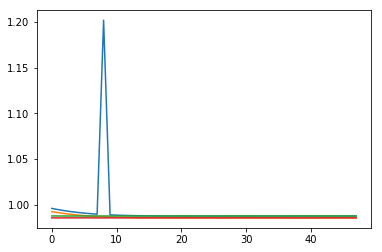

In [202]:
print(pd.DataFrame(history.history).min())
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.plot(history2.history['loss'][2:])
plt.plot(history2.history['val_loss'][2:])
#plt.yscale('log')

In [191]:
encoded_lcs_train = RAE1.encoder(X_train).numpy()
decoded_lcs_train = RAE1.decoder(encoded_lcs_train).numpy()

encoded_lcs_test = RAE1.encoder(X_test).numpy()
decoded_lcs_test = RAE1.decoder(encoded_lcs_test).numpy()

In [117]:
encoded_lcs_train.shape, decoded_lcs_train.shape

((2926, 10), (2926, 100))

Text(0,0.5,'mag_aper2 - test data')

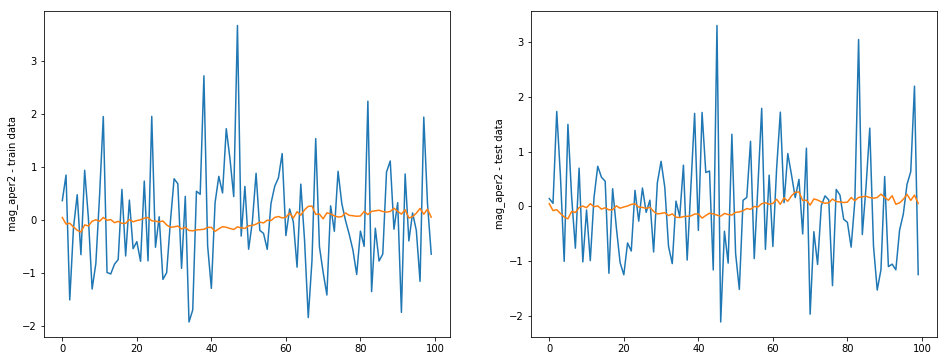

In [192]:
index = 5;

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(X_train[index][0])
plt.plot(decoded_lcs_train[index])
plt.ylabel('mag_aper2 - train data')

plt.subplot(1,2,2)
plt.plot(X_test[index][0])
plt.plot(decoded_lcs_test[index])
plt.ylabel('mag_aper2 - test data')

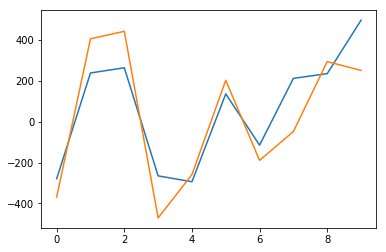

In [193]:
plt.plot(encoded_lcs_train[20])
plt.plot(encoded_lcs_train[22])